In [239]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import gensim
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [240]:
pd.set_option('display.max_columns', None)

<b>Obtain general overview of data</b>¶

In [241]:
df = pd.read_csv('profiles.csv')
df.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

In [243]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [244]:
print("nnumber of categories:",df['sign'].nunique())
print("categories:", df['sign'].unique())

nnumber of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorp

<b>Clean label data (zodiacs) for later implementation in ML classifier</b>¶

In [245]:
df['signsCleaned'] = df['sign'].str.split().str.get(0)
print("nnumber of categories:", df['signsCleaned'].nunique())
print("categories:", df['signsCleaned'].unique())

df['signsCleaned'].value_counts()

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

<b>Visualize data and their dependencies</b>¶

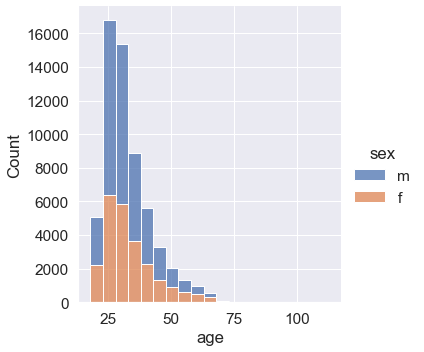

In [246]:
sns.displot(data=df, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

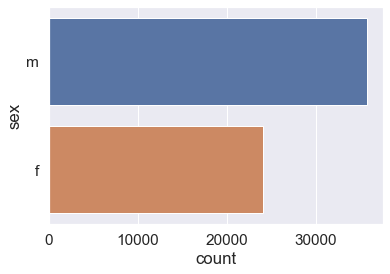

In [247]:
sns.countplot(data=df, y="sex");

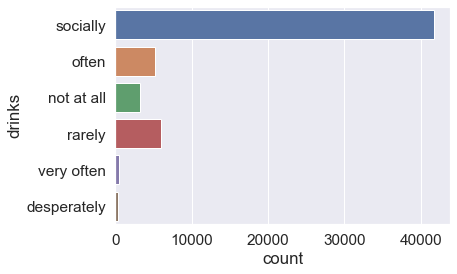

In [248]:
sns.countplot(data=df, y="drinks");

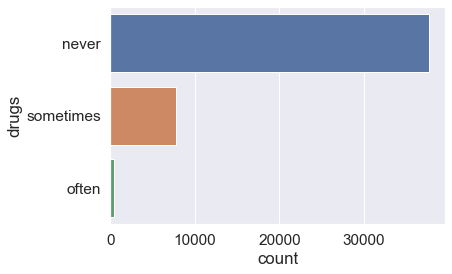

In [249]:
sns.countplot(data=df, y="drugs");

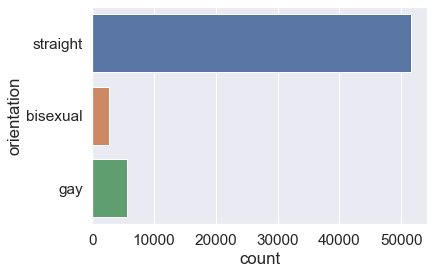

In [250]:
sns.countplot(data=df, y="orientation");

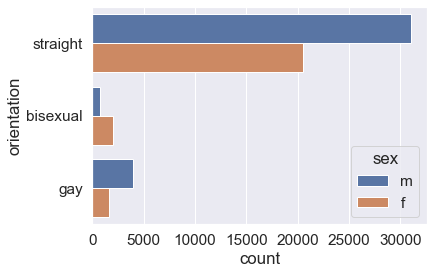

In [251]:
sns.countplot(data=df, y="orientation", hue = "sex");

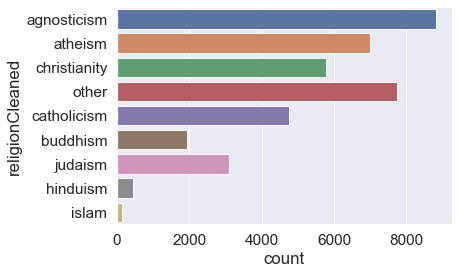

In [252]:
df['religionCleaned'] = df['religion'].str.split().str.get(0)
sns.countplot(data=df, y="religionCleaned");

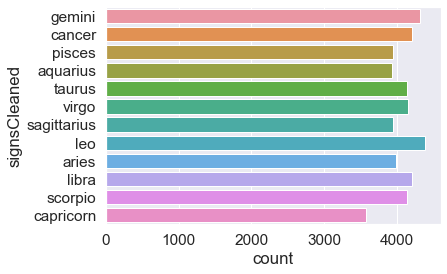

In [253]:
sns.countplot(data=df, y="signsCleaned");

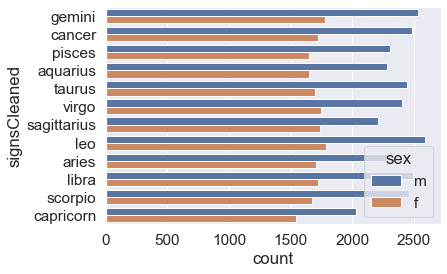

In [254]:
sns.countplot(data=df, y="signsCleaned", hue='sex');

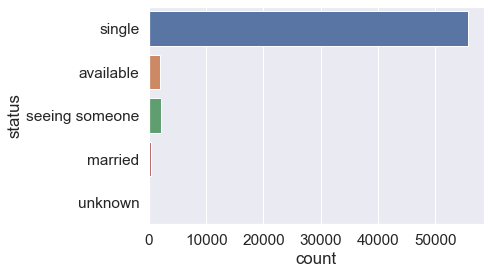

In [255]:
sns.countplot(data=df, y="status");

<b>1. Use NLP to detect language usage</b>
First step is to clean text from tags, punctuation, space, digits

In [256]:
def clean_txt(text_input):
    clean_noise = []
    
    text_lst = [[str(items)] for items in text_input]
    
    for x in range(len(text_lst)):
        for text in text_lst[x]:
            no_tag = re.sub(r'<[^>]+>','', text)
            no_space = re.sub(r'[ \t\r\n]',' ', no_tag)
            no_punct = re.sub(r'[^\w\s]','', no_space)
            no_digit = re.sub(r'[ \d+]', ' ', no_punct)
            clean_noise.append([no_digit])
            
    return clean_noise


<b>1. Use NLP to detect language usage</b>
Second step is to tokenize text for NLP model integration

In [257]:
def tokenizer(cleaned_text):
    text_tokenized = []
    text_clean = clean_txt(cleaned_text)
    
    for x in range(len(text_clean)):
        for words in text_clean[x]:
            text_tokenized.append(word_tokenize(words))
            
    stop_words = set(stopwords.words('english'))
    
    #combined outer and inner loop to preserve nested list structure
    no_stop_tokenized = [[word for word in sub_lst if word not in stop_words] for sub_lst in text_tokenized]
    
    stemmer = PorterStemmer()
    stemmed_words = [[ stemmer.stem(word) for word in sub_lst ] for sub_lst in no_stop_tokenized]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [[ lemmatizer.lemmatize(word) for word in sub_lst ] for sub_lst in stemmed_words]
    
    return lemmatized_words
text_tokenizer = tokenizer(df['essay0'][:1000])
print(Counter(text_tokenizer[6]))

Counter({'life': 2, 'littl': 1, 'thing': 1, 'love': 1, 'laugh': 1, 'easi': 1, 'one': 1, 'find': 1, 'beauti': 1, 'humor': 1, 'ugli': 1, 'perspect': 1, 'make': 1, 'gratifi': 1, 'gift': 1, 'play': 1})


<b>1. Use NLP to detect language usage</b>
Third the gensim model is used to learn the used vocabulary and find contextural affiliated words in it

In [258]:
embedding_model = gensim.models.Word2Vec(text_tokenizer, size=96, window=5, 
                                         min_count=1, workers=2, sg=1)

In [259]:
print(embedding_model)

Word2Vec(vocab=7461, size=96, alpha=0.025)


In [260]:
similar_to_love = embedding_model.wv.most_similar("love", topn=10)

In [261]:
print(similar_to_love)

[('time', 0.9917505979537964), ('spend', 0.9906144142150879), ('famili', 0.9897242784500122), ('friend', 0.9896790385246277), ('learn', 0.9888647198677063), ('enjoy', 0.9880415201187134), ('travel', 0.9874175190925598), ('hang', 0.9850575923919678), ('adventur', 0.9837889671325684), ('go', 0.982515275478363)]


In [262]:
similar_to_life = embedding_model.wv.most_similar("life", topn=10)

In [263]:
print(similar_to_life)

[('experi', 0.9951403141021729), ('adventur', 0.9939674139022827), ('alway', 0.9938527345657349), ('hang', 0.9931920170783997), ('mani', 0.9929726719856262), ('someth', 0.9928065538406372), ('realli', 0.9926366209983826), ('great', 0.992402970790863), ('happi', 0.992162823677063), ('much', 0.9911131858825684)]


In [264]:
df_high_edu = df.loc[df['education'] == 'college/university', ['essay0']]
len(df_high_edu['essay0'].dropna())

699

In [265]:
text_tokenizer_edu_high = tokenizer(df_high_edu['essay0'].dropna()[:1000])

In [266]:
embedding_model_edu_high = gensim.models.Word2Vec(text_tokenizer_edu_high, size=96, window=5, 
                                         min_count=1, workers=2, sg=1)

In [267]:
print(embedding_model_edu_high)

Word2Vec(vocab=6110, size=96, alpha=0.025)


In [268]:
similar_to_love_edu_high = embedding_model_edu_high.wv.most_similar("love", topn=10)

In [269]:
print(similar_to_love_edu_high)

[('enjoy', 0.9982902407646179), ('friend', 0.9971326589584351), ('life', 0.9966834783554077), ('good', 0.9966167211532593), ('adventur', 0.9966043829917908), ('experi', 0.9965324997901917), ('go', 0.9961884021759033), ('see', 0.996077835559845), ('make', 0.9959970712661743), ('learn', 0.9959776997566223)]


In [270]:
similar_to_life_edu_high = embedding_model_edu_high.wv.most_similar("life", topn=10)
print(similar_to_life_edu_high)

[('fun', 0.9988909363746643), ('share', 0.9988815188407898), ('find', 0.9986252784729004), ('happi', 0.9985883831977844), ('enjoy', 0.9985382556915283), ('think', 0.9985184669494629), ('make', 0.9985060095787048), ('would', 0.9984320998191833), ('interest', 0.9983927011489868), ('someth', 0.9983527064323425)]


In [271]:
df_middle_edu = df.loc[df['education'] == 'high school', ['essay0']]
df_middle_edu['essay0'].dropna()

436      i not sure what to say???i'm new to the dating...
4066                                        if rather talk
5230     i'm good in friendly in looking for dating fri...
6342     i am a good guy looking. for down. to earth. f...
6468     sorry i'm not good selling my self on the comp...
                               ...                        
57693    i'm friggin' amazing or, so i've been told by ...
58121    hi, im new to this site. here online trying to...
58270    i'm a chill ass guy who like to kickit but i'm...
58629    hello, my name is miguel and im from tucson ar...
59044                                          gay for pay
Name: essay0, Length: 69, dtype: object

In [272]:
text_tokenizer_edu_middle = tokenizer(df_middle_edu['essay0'].dropna()[:1000])

In [273]:
embedding_model_edu_middle = gensim.models.Word2Vec(text_tokenizer_edu_middle, size=96, window=5, 
                                         min_count=1, workers=2, sg=1)

In [274]:
print(embedding_model_edu_middle)

Word2Vec(vocab=843, size=96, alpha=0.025)


In [275]:
similar_to_love_edu_middle = embedding_model_edu_middle.wv.most_similar("love", topn=10)
print(similar_to_love_edu_middle)

[('im', 0.8985486030578613), ('like', 0.8893433213233948), ('work', 0.8638461828231812), ('dont', 0.8574308156967163), ('life', 0.856847882270813), ('care', 0.8504794836044312), ('time', 0.8500557541847229), ('good', 0.8424586057662964), ('get', 0.8371614813804626), ('long', 0.8328866362571716)]


In [276]:
similar_to_life_edu_middle = embedding_model_edu_middle.wv.most_similar("life", topn=10)
print(similar_to_life_edu_middle)

[('like', 0.9095103144645691), ('im', 0.9070842266082764), ('dont', 0.8727909326553345), ('get', 0.8705247640609741), ('one', 0.8661623001098633), ('time', 0.864281415939331), ('love', 0.856847882270813), ('work', 0.8561372756958008), ('look', 0.8466808199882507), ('heart', 0.8427436351776123)]


In [277]:
df_men = df.loc[df['sex'] == 'm', ['essay0']]
df_men['essay0'].dropna()
text_tokenizer_men = tokenizer(df_men['essay0'].dropna()[:1000])
embedding_model_men = gensim.models.Word2Vec(text_tokenizer_men, size=96, window=5, 
                                         min_count=1, workers=2, sg=1)
print(embedding_model_men)

Word2Vec(vocab=7491, size=96, alpha=0.025)


In [278]:
similar_to_love_men = embedding_model_men.wv.most_similar("love", topn=10)
print(similar_to_love_men)

[('enjoy', 0.9971455335617065), ('outdoor', 0.9910843968391418), ('go', 0.9873155355453491), ('lot', 0.9872851967811584), ('adventur', 0.9871775507926941), ('food', 0.984178364276886), ('travel', 0.9840499758720398), ('spend', 0.9830344319343567), ('time', 0.9823717474937439), ('restaur', 0.9789518713951111)]


In [279]:
men_similar_to_women = embedding_model_men.wv.most_similar("woman", topn=10)
print(men_similar_to_women)

[('nice', 0.9978913068771362), ('open', 0.9976065754890442), ('relationship', 0.9969161152839661), ('see', 0.9961072206497192), ('guy', 0.9960751533508301), ('id', 0.9959503412246704), ('find', 0.9959201216697693), ('make', 0.9957951903343201), ('would', 0.9954898357391357), ('right', 0.9954742193222046)]


In [280]:
df_women = df.loc[df['sex'] == 'f', ['essay0']]
df_women['essay0'].dropna()
text_tokenizer_women = tokenizer(df_women['essay0'].dropna()[:1000])
embedding_model_women = gensim.models.Word2Vec(text_tokenizer_women, size=96, window=5, 
                                         min_count=1, workers=2, sg=1)
print(embedding_model_women)

Word2Vec(vocab=7840, size=96, alpha=0.025)


In [281]:
similar_to_love_women = embedding_model_women.wv.most_similar("love", topn=10)
print(similar_to_love_women)

[('go', 0.990653932094574), ('enjoy', 0.9882551431655884), ('spend', 0.9871934652328491), ('travel', 0.9864898324012756), ('outdoor', 0.9833022952079773), ('hang', 0.9805626273155212), ('restaur', 0.9803595542907715), ('activ', 0.9775236248970032), ('around', 0.9750984311103821), ('adventur', 0.974919855594635)]


In [282]:
women_similar_to_men = embedding_model_women.wv.most_similar("man", topn=10)
print(women_similar_to_men)

[('guy', 0.9966647028923035), ('smart', 0.9966485500335693), ('respect', 0.9957109093666077), ('doesnt', 0.9953256249427795), ('real', 0.9952830076217651), ('mind', 0.9946012496948242), ('seriou', 0.9945735335350037), ('funni', 0.9945569038391113), ('confid', 0.9931820631027222), ('sarcast', 0.9930211901664734)]


<b>2. Use ML Random Forest to forecast zodiac signs</b>
First make a copy of the dataframe to prepare it for implementation into classifier

In [283]:
df_with_zodiac = df.copy()
df_with_zodiac = df_with_zodiac.dropna(subset = ['sign'])
df_with_zodiac.head(4)
len(df_with_zodiac)

48890

<b>2. Use ML Random Forest to forecast zodiac signs</b>
Second decide which features should be incorporated into the training model and drop NAN rows

In [284]:
features = ['drugs','orientation', 'status', 'sex', 'drinks', 'signsCleaned']
df_zodiacs = df[features].dropna()
df_zodiacs.shape

(36876, 6)

<b>2. Use ML Random Forest to forecast zodiac signs</b>
Third use dummy labelling of categorical data or own assign integer labbeling (the latter was employed here)

if dummies would be used, the following code would be appropriate to convert the categorical data into 0 and 1

for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [285]:
df_zodiacs.head()

,drugs,orientation,status,sex,drinks,signsCleaned
0,never,straight,single,m,socially,gemini
1,sometimes,straight,single,m,often,cancer
4,never,straight,single,m,socially,aquarius
6,never,straight,single,f,socially,virgo
7,never,straight,single,f,socially,sagittarius


In [286]:
df_zodiacs['signsCleaned'].value_counts()

leo            3273
gemini         3236
cancer         3181
virgo          3181
libra          3166
taurus         3136
scorpio        3094
aries          3030
aquarius       2956
sagittarius    2954
pisces         2937
capricorn      2732
Name: signsCleaned, dtype: int64

In [287]:
df_zodiacs.loc[df_zodiacs['drugs'] == 'sometimes']

,drugs,orientation,status,sex,drinks,signsCleaned
1,sometimes,straight,single,m,often,cancer
24,sometimes,straight,single,m,socially,scorpio
29,sometimes,straight,single,m,socially,leo
42,sometimes,straight,single,m,often,gemini
44,sometimes,bisexual,single,f,socially,aquarius
...,...,...,...,...,...,...
59920,sometimes,straight,single,f,socially,sagittarius
59922,sometimes,straight,single,f,socially,cancer
59929,sometimes,straight,single,m,socially,pisces
59932,sometimes,straight,single,m,socially,sagittarius


In [288]:
df_zodiacs.groupby(df_zodiacs['drugs']).count()

,orientation,status,sex,drinks,signsCleaned
drugs,,,,,
never,29790,29790,29790,29790,29790
often,335,335,335,335,335
sometimes,6751,6751,6751,6751,6751


In [289]:
df_zodiacs['drugs'] = df_zodiacs['drugs'].apply(lambda row: 0 if row == 'never'
                                                            else (1 if row == 'sometimes' else 2))
df_zodiacs.head(3)

,drugs,orientation,status,sex,drinks,signsCleaned
0,0,straight,single,m,socially,gemini
1,1,straight,single,m,often,cancer
4,0,straight,single,m,socially,aquarius


In [290]:
df_zodiacs.groupby(df_zodiacs['orientation']).count()

,drugs,status,sex,drinks,signsCleaned
orientation,,,,,
bisexual,1717,1717,1717,1717,1717
gay,3785,3785,3785,3785,3785
straight,31374,31374,31374,31374,31374


In [291]:
df_zodiacs['orientation'] = df_zodiacs['orientation'].apply(lambda row: 0 if row == 'straight' 
                                                                        else (1 if row == 'bisexual' else 2))

In [292]:
df_zodiacs.head(3)

,drugs,orientation,status,sex,drinks,signsCleaned
0,0,0,single,m,socially,gemini
1,1,0,single,m,often,cancer
4,0,0,single,m,socially,aquarius


In [293]:
df_zodiacs.groupby(df_zodiacs['status']).count()

,drugs,orientation,status,sex,drinks,signsCleaned
status,,,,,,
available,1140,1140,1140,1140,1140,1140
married,212,212,212,212,212,212
seeing someone,1324,1324,1324,1324,1324,1324
single,34194,34194,34194,34194,34194,34194
unknown,6,6,6,6,6,6


In [294]:
df_zodiacs = df_zodiacs.loc[df_zodiacs['status'] != 'unknown']
df_zodiacs.groupby(df_zodiacs['status']).count()

,drugs,orientation,sex,drinks,signsCleaned
status,,,,,
available,1140,1140,1140,1140,1140
married,212,212,212,212,212
seeing someone,1324,1324,1324,1324,1324
single,34194,34194,34194,34194,34194


In [295]:
df_zodiacs['status'] = df_zodiacs['status'].apply(lambda row: 0 if row == 'single' 
                                                                        else (1 if row == 'available' 
                                                                        else (2 if row == 'seeing someone'
                                                                        else 3)))

In [296]:
df_zodiacs.head(3)

,drugs,orientation,status,sex,drinks,signsCleaned
0,0,0,0,m,socially,gemini
1,1,0,0,m,often,cancer
4,0,0,0,m,socially,aquarius


In [297]:
df_zodiacs['sex'] = df_zodiacs['sex'].apply(lambda row: 0 if row == 'm' else 1)



In [298]:
df_zodiacs.head(3)

,drugs,orientation,status,sex,drinks,signsCleaned
0,0,0,0,0,socially,gemini
1,1,0,0,0,often,cancer
4,0,0,0,0,socially,aquarius


In [299]:
df_zodiacs['drinks'] = df_zodiacs['drinks'].apply(lambda row: 0 if row == 'desperately'
                                                            else (1 if row == 'very often'
                                                            else (2 if row == 'often'
                                                            else (3 if row == 'socially'
                                                            else (4 if row == 'rarely'
                                                            else 5)))))

In [300]:
df_zodiacs.head(3)

,drugs,orientation,status,sex,drinks,signsCleaned
0,0,0,0,0,3,gemini
1,1,0,0,0,2,cancer
4,0,0,0,0,3,aquarius


<b>2. Use ML Random Forest to forecast zodiac signs</b>
Forth splitting of train and test data

In [301]:
col_length = len(df_zodiacs.columns)

#labels is the target column, data has the rest
data = df_zodiacs.iloc[:, 0:col_length-1]
labels = df_zodiacs.iloc[:, -1:]

Fifth: Checking for label imbalance, if imbalance ML clasifier can not properly train since too few labels for training are available. In this example the labels are in balance

In [302]:
df_zodiacs['signsCleaned'].value_counts()

leo            3271
gemini         3236
cancer         3181
virgo          3181
libra          3166
taurus         3136
scorpio        3093
aries          3030
aquarius       2955
sagittarius    2954
pisces         2936
capricorn      2731
Name: signsCleaned, dtype: int64

In [303]:
#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=val_size, random_state = 0)

#turn in to 1d arrays
train_labels = train_labels.to_numpy().ravel()
test_labels = test_labels.to_numpy().ravel()

<b>2. Use ML Random Forest to forecast zodiac signs</b>
Sixth prediction

In [304]:
forest = RandomForestClassifier(random_state = 1)

In [305]:
forest.fit(train_data, train_labels)

RandomForestClassifier(random_state=1)

In [306]:
forest_predictions_train = forest.predict(train_data)

In [307]:
print(classification_report(train_labels, forest_predictions_train))

              precision    recall  f1-score   support

    aquarius       0.23      0.02      0.03      2184
       aries       0.11      0.11      0.11      2293
      cancer       0.12      0.07      0.09      2398
   capricorn       0.32      0.01      0.01      2027
      gemini       0.17      0.03      0.06      2408
         leo       0.10      0.33      0.15      2440
       libra       0.10      0.41      0.16      2396
      pisces       0.12      0.04      0.06      2259
 sagittarius       0.14      0.03      0.05      2201
     scorpio       0.12      0.09      0.10      2337
      taurus       0.16      0.06      0.09      2341
       virgo       0.13      0.09      0.11      2368

    accuracy                           0.11     27652
   macro avg       0.15      0.11      0.08     27652
weighted avg       0.15      0.11      0.09     27652



The final accuracy of the random forest model on training data is 11% which is poor compareed to random guessing (~8%) of the time (1/12).

In [308]:
print(forest.score(test_data, test_labels))

0.08396615317856368


As assumed, on test data this accuracy gets even lower to only 8%!

In [309]:
forest_prediction_test = forest.predict(test_data)
forest_prediction_test


array(['leo', 'scorpio', 'libra', ..., 'leo', 'libra', 'aries'],
      dtype=object)

In [310]:
confusion_matrix(test_labels, forest_prediction_test)

array([[  6,  52,  45,   2,  15, 237, 274,  19,  21,  43,  17,  40],
       [  3,  67,  35,   0,  10, 240, 240,  17,  12,  45,  27,  41],
       [  7,  84,  37,   3,  16, 223, 260,  24,  14,  36,  23,  56],
       [  5,  61,  40,   1,  12, 209, 255,  14,  14,  34,  26,  33],
       [  4,  88,  49,   2,   9, 225, 286,  19,  14,  62,  29,  41],
       [  5,  68,  49,   1,  10, 249, 285,  20,  17,  50,  23,  54],
       [  2,  49,  43,   1,   8, 242, 273,  24,  18,  36,  30,  44],
       [  2,  47,  33,   1,  10, 205, 251,  18,  18,  45,  11,  36],
       [  8,  62,  47,   0,  11, 241, 229,  17,  11,  62,  18,  47],
       [  5,  63,  46,   2,   3, 238, 255,  20,  19,  39,  20,  46],
       [  5,  70,  45,   1,  13, 235, 296,  16,  12,  44,  22,  36],
       [  1,  67,  35,   1,  15, 245, 286,  27,  15,  61,  18,  42]],
      dtype=int64)

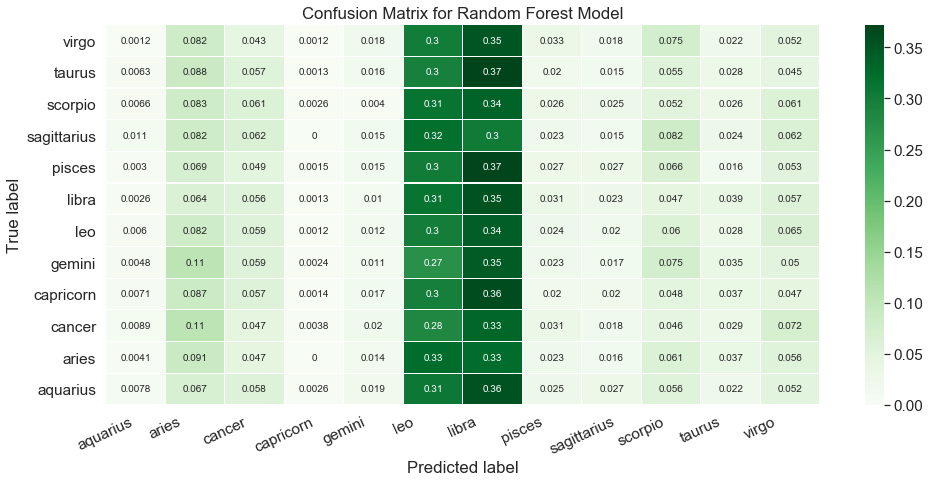

In [311]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(test_labels, forest_prediction_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo', 'libra', 'pisces',
               'sagittarius','scorpio', 'taurus','virgo']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
#plt.xlim(-0.5, len(np.unique(y))-0.5)
plt.ylim(-0.0,11 +1.0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

The highest corrrelation on test is acheved for the leo and libra zodiacs

<b>3. Use ML K-Nearest Neighbor to forecast zodiac signs</b>

In [312]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(train_data, train_labels)
knn_prediction_train = knn_model.predict(train_data)

In [313]:
print(classification_report(train_labels, knn_prediction_train))

              precision    recall  f1-score   support

    aquarius       0.09      0.15      0.11      2184
       aries       0.09      0.09      0.09      2293
      cancer       0.11      0.05      0.07      2398
   capricorn       0.07      0.36      0.12      2027
      gemini       0.11      0.04      0.06      2408
         leo       0.17      0.01      0.03      2440
       libra       0.10      0.05      0.06      2396
      pisces       0.09      0.04      0.06      2259
 sagittarius       0.11      0.02      0.03      2201
     scorpio       0.15      0.02      0.03      2337
      taurus       0.14      0.01      0.02      2341
       virgo       0.09      0.24      0.13      2368

    accuracy                           0.09     27652
   macro avg       0.11      0.09      0.07     27652
weighted avg       0.11      0.09      0.07     27652



The final accuracy of the knn nearest Neighbor model on training data is 8% which is poor compareed to random guessing (~8%) of the time (1/12).

In [314]:
knn_prediction_test = knn_model.predict(test_data)
print(knn_model.score(test_data, test_labels))

0.08396615317856368


The score on the test data is equaly poor for the knn classification model

<b>4. Use ML Decision Trees to forecast zodiac signs</b>

In [315]:
tree = DecisionTreeClassifier().fit(train_data, train_labels) 
tree_predictions_train = tree.predict(train_data) 

In [316]:
print(classification_report(train_labels, tree_predictions_train))

              precision    recall  f1-score   support

    aquarius       0.23      0.02      0.04      2184
       aries       0.12      0.12      0.12      2293
      cancer       0.12      0.08      0.10      2398
   capricorn       0.26      0.01      0.02      2027
      gemini       0.15      0.05      0.07      2408
         leo       0.10      0.37      0.16      2440
       libra       0.10      0.41      0.16      2396
      pisces       0.12      0.04      0.06      2259
 sagittarius       0.14      0.03      0.05      2201
     scorpio       0.20      0.03      0.05      2337
      taurus       0.16      0.05      0.07      2341
       virgo       0.12      0.08      0.10      2368

    accuracy                           0.11     27652
   macro avg       0.15      0.11      0.08     27652
weighted avg       0.15      0.11      0.08     27652



The accurcy for the decision tree classfier to forecast zodiac signs is with 11% equally to the random forest calssifier tested above!

In [317]:
tree.get_depth()

12

In [318]:
tree_prediction_test = tree.predict(test_data)
print(tree.score(test_data, test_labels))

0.08591885441527446


The accurcy for the decision tree classfier on test data is with 8% equally to guessing.

In [319]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(tree, train_data, train_labels, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08913397 0.09094196 0.08444846 0.08499096 0.08300181]
Baseline: 8.65% (0.30%)


Increasing the depth from 12 to 500 (risk of overfitting, this is just for illustration purpose)

In [320]:
tree20 = DecisionTreeClassifier(max_depth = 500).fit(train_data, train_labels) 
tree20_predict = tree20.predict(train_data) 

In [321]:
print(classification_report(train_labels, tree20_predict))

              precision    recall  f1-score   support

    aquarius       0.23      0.02      0.04      2184
       aries       0.12      0.12      0.12      2293
      cancer       0.12      0.08      0.10      2398
   capricorn       0.26      0.01      0.02      2027
      gemini       0.15      0.05      0.07      2408
         leo       0.10      0.37      0.16      2440
       libra       0.10      0.41      0.16      2396
      pisces       0.12      0.04      0.06      2259
 sagittarius       0.14      0.03      0.05      2201
     scorpio       0.20      0.03      0.05      2337
      taurus       0.16      0.05      0.07      2341
       virgo       0.12      0.08      0.10      2368

    accuracy                           0.11     27652
   macro avg       0.15      0.11      0.08     27652
weighted avg       0.15      0.11      0.08     27652



Even though the depth was set very high, the impact on accuracy has not improved

<b>5. Use ML Logistic regression to forecast zodiac signs</b>

In [322]:
logistic_regression = LogisticRegression(multi_class="multinomial").fit(train_data, train_labels)
logistic_regression_predictions = logistic_regression.predict(train_data)

In [323]:
import warnings
warnings.filterwarnings('ignore')

In [324]:
print(classification_report(train_labels, logistic_regression_predictions))

              precision    recall  f1-score   support

    aquarius       0.00      0.00      0.00      2184
       aries       0.00      0.00      0.00      2293
      cancer       0.14      0.00      0.00      2398
   capricorn       0.00      0.00      0.00      2027
      gemini       0.10      0.10      0.10      2408
         leo       0.09      0.35      0.14      2440
       libra       0.10      0.42      0.15      2396
      pisces       0.00      0.00      0.00      2259
 sagittarius       0.00      0.00      0.00      2201
     scorpio       0.09      0.10      0.10      2337
      taurus       0.11      0.02      0.04      2341
       virgo       0.10      0.10      0.10      2368

    accuracy                           0.09     27652
   macro avg       0.06      0.09      0.05     27652
weighted avg       0.06      0.09      0.06     27652



The accuracy on the logistic regression training data for zodiac sign prediction is with 9% also poor

<b>Conclusion:</b> The k-Nearest Neighbor and the Random Forest Classifier obtained the highest precision scores, especially for the zodiacs leo and libra. Overall precision was however poor and just a little better than random guessing. In the next step, the incorporation of further features could be employed to further improve the accuracy of the models.

<b>6.Use Unsupervised learning KMeans for clustering</b> 

In [325]:
kmeans_classifier = KMeans(n_clusters = 12, random_state=1)

In [326]:
kmeans_classifier.fit(data)

KMeans(n_clusters=12, random_state=1)

In [327]:
print(kmeans_classifier.cluster_centers_)

[[ 1.34665508e-02  7.21112076e-02  4.12684622e-02  1.00000000e+00
   4.38010426e+00]
 [ 1.02418074e-14  1.09727985e-02  2.05624712e-02 -4.99600361e-16
   2.91931766e+00]
 [ 2.01014125e-01  2.00000000e+00  2.86128214e-02  2.36508511e-01
   2.86562840e+00]
 [ 9.71445147e-15  3.36358783e-02  8.54244527e-03  1.00000000e+00
   2.93721303e+00]
 [ 9.58604376e-01  1.35422827e-01  7.68775872e-02  3.62507392e-01
   1.61502070e+00]
 [ 3.59019264e-01  1.43082312e+00  1.84588441e+00  6.84763573e-01
   3.21366025e+00]
 [ 2.77939747e-01  4.85908649e-03  2.15451895e+00  4.22740525e-01
   3.03498542e+00]
 [ 6.32440476e-02  3.42261905e-02  9.22619048e-02  1.38777878e-15
   5.00000000e+00]
 [ 9.87983979e-02  2.00000000e+00  4.80640854e-02  2.96395194e-01
   4.42990654e+00]
 [ 1.03950532e+00  4.94675369e-02  7.38577808e-02 -2.83106871e-15
   3.10443147e+00]
 [-5.27355937e-16  2.65339967e-02  2.92979547e-02  1.60982339e-15
   4.00000000e+00]
 [ 1.03014066e+00  2.53181514e-01  7.90354990e-02  1.00000000e+00

Using Adjusted Rand Index to veryfy accuracy of clustering

In [328]:
from sklearn.metrics.cluster import adjusted_rand_score

In [329]:
kmean_label_predict = kmeans_classifier.predict(data)

In [330]:
print(kmean_label_predict)

[1 4 1 ... 4 7 9]


In [333]:
true_labels = []

for x in df_zodiacs['signsCleaned']:
    if x == 'leo':
        true_labels.append(0)
    elif x == 'gemini':
        true_labels.append(1)
    elif x == 'cancer':
        true_labels.append(2)
    elif x == 'virgo':
        true_labels.append(3)
    elif x == 'libra':
        true_labels.append(4)
    elif x == 'taurus':
        true_labels.append(5)
    elif x == 'scorpio':
        true_labels.append(6)
    elif x == 'aries':
        true_labels.append(7)
    elif x == 'aquarius':
        true_labels.append(8)
    elif x == 'sagittarius':
        true_labels.append(9)
    elif x == 'pisces':
        true_labels.append(10)
    else:
        true_labels.append(11)

In [332]:
adjusted_rand_score(true_labels, kmean_label_predict)

4.704281231801968e-05

Conclusion: The predicted labelling of the kmeans classifier is very low (not negative though). The model would need other features or another unsupervised learning classifier would have to be tested